In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [24]:
df=pd.read_csv('Documents/insurance .csv')

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [29]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
df.duplicated

<bound method DataFrame.duplicated of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [31]:
df.duplicated().sum()

1

In [32]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [33]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [34]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [35]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [36]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [37]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [38]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [40]:
df['smoker'].nunique()

2

In [41]:
df['age'].nunique()

47

In [42]:

df['children'].nunique()

6

In [43]:
df['region'].nunique()

4

In [44]:
df['bmi'].nunique()

548

In [45]:
df['charges'].nunique()

1337

In [46]:
import seaborn as sns

<Axes: >

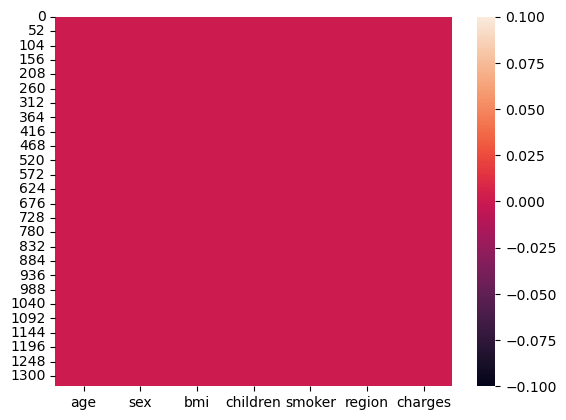

In [47]:
sns.heatmap(df.isnull())

In [48]:
df.shape[0]

1338

In [49]:
df.shape[1]

7

In [50]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [51]:
df.to_csv('model1')

In [52]:
import matplotlib.pyplot as plt

In [53]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [54]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [55]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [56]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [57]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [58]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [59]:
df['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

<Axes: xlabel='age'>

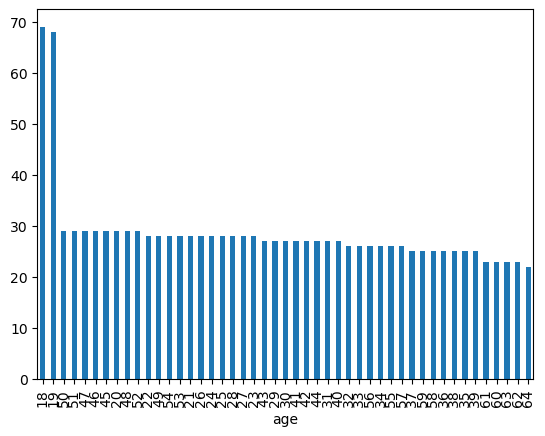

In [60]:
df['age'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

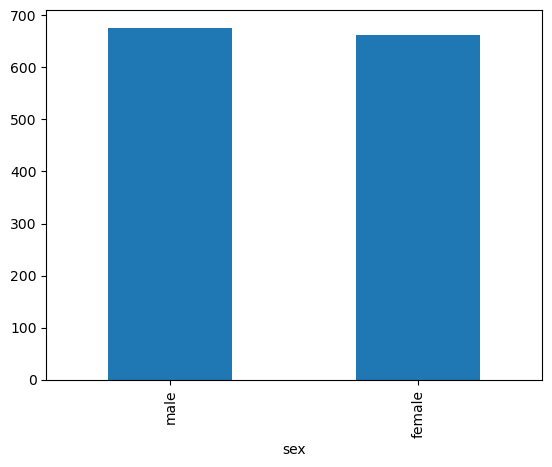

In [61]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

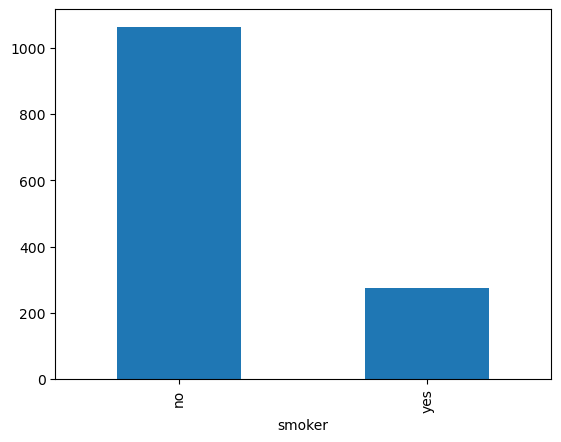

In [62]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='bmi'>

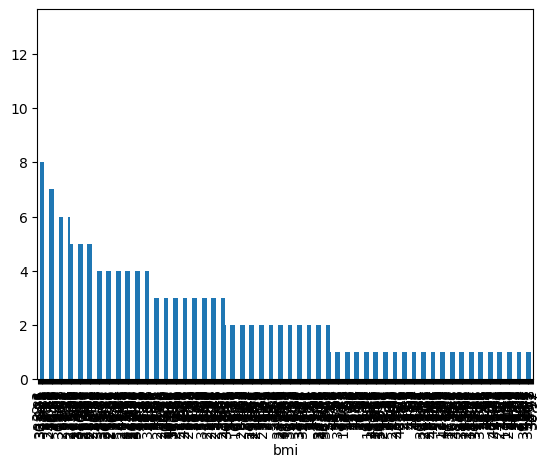

In [63]:
df['bmi'].value_counts().plot(kind='bar')

<Axes: xlabel='children'>

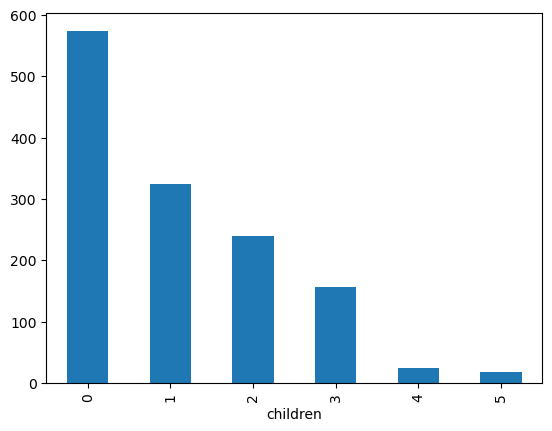

In [64]:
df['children'].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

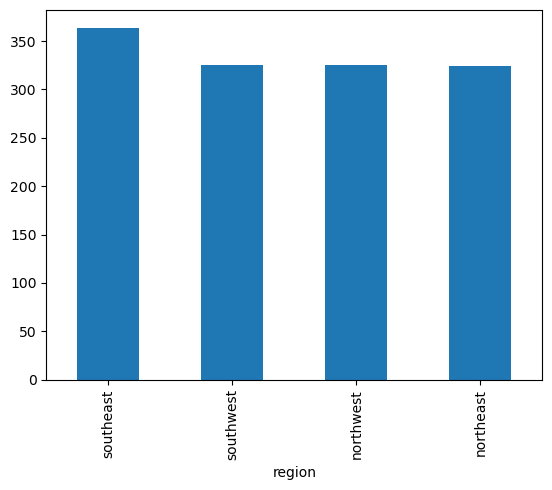

In [65]:
df['region'].value_counts().plot(kind='bar')

<Axes: xlabel='charges'>

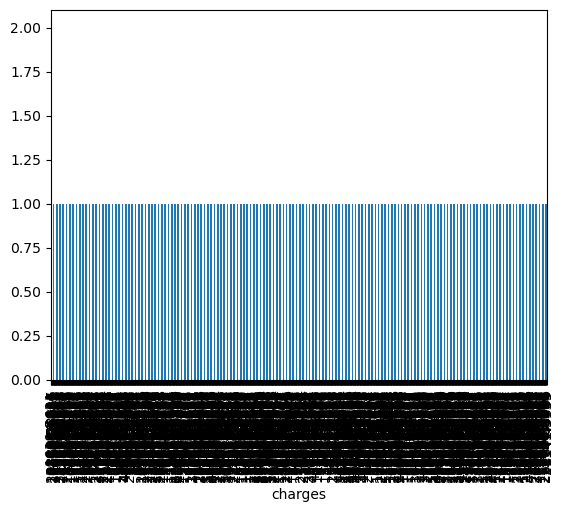

In [66]:
df['charges'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

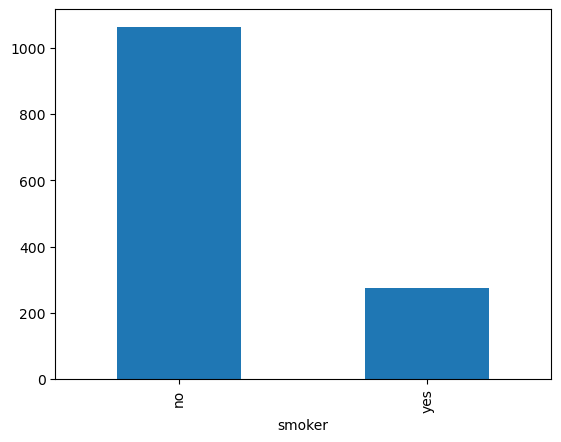

In [67]:
df['smoker'].value_counts().plot(kind='bar')

In [68]:
import seaborn as sb

<Axes: ylabel='age'>

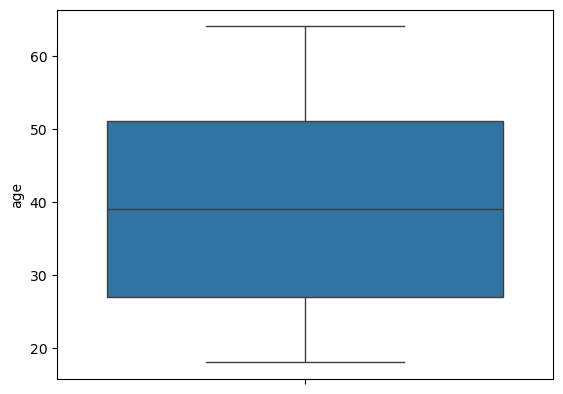

In [69]:
sb.boxplot(df.age)

<Axes: ylabel='bmi'>

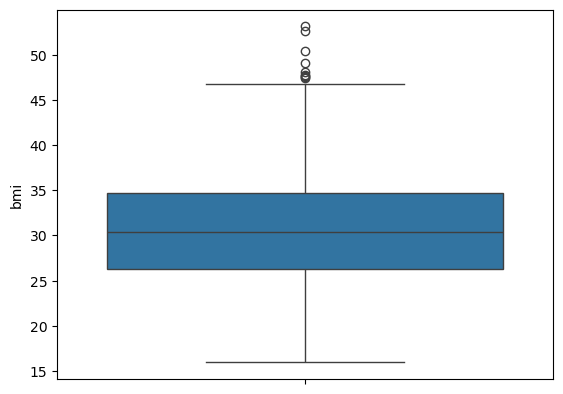

In [70]:
sb.boxplot(df.bmi)

<Axes: ylabel='region'>

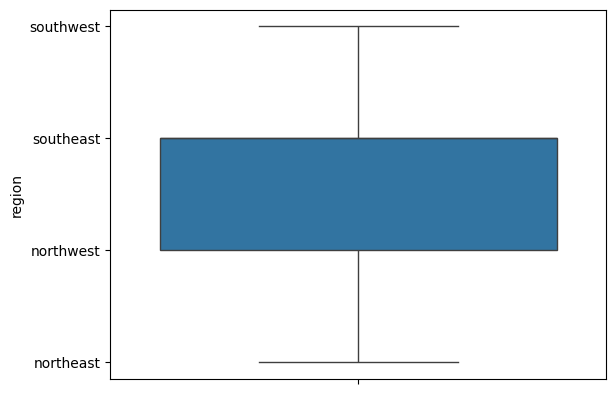

In [71]:
sb.boxplot(df.region)

<Axes: ylabel='charges'>

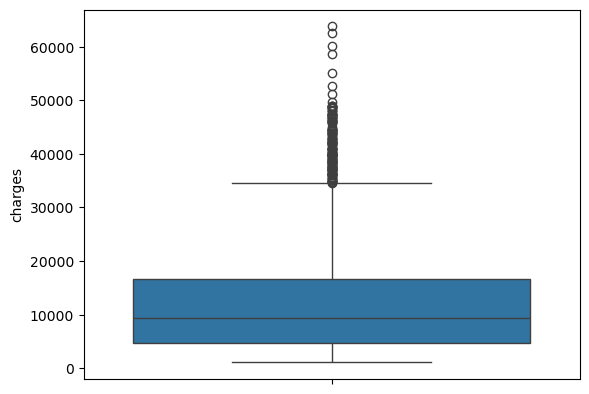

In [72]:
sb.boxplot(df.charges)

<Axes: ylabel='smoker'>

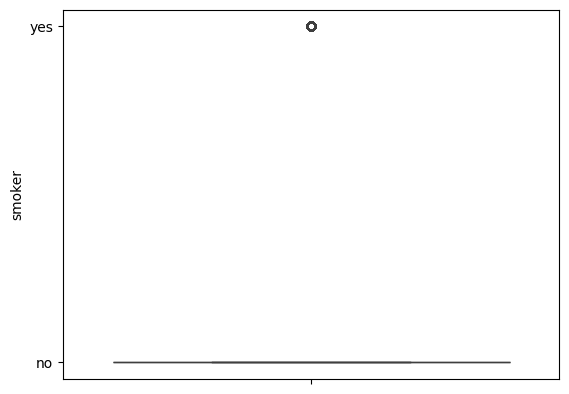

In [73]:
sb.boxplot(df.smoker)

<Axes: ylabel='children'>

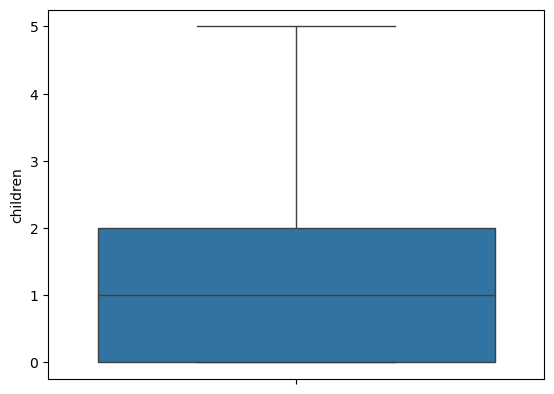

In [74]:
sb.boxplot(df.children)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


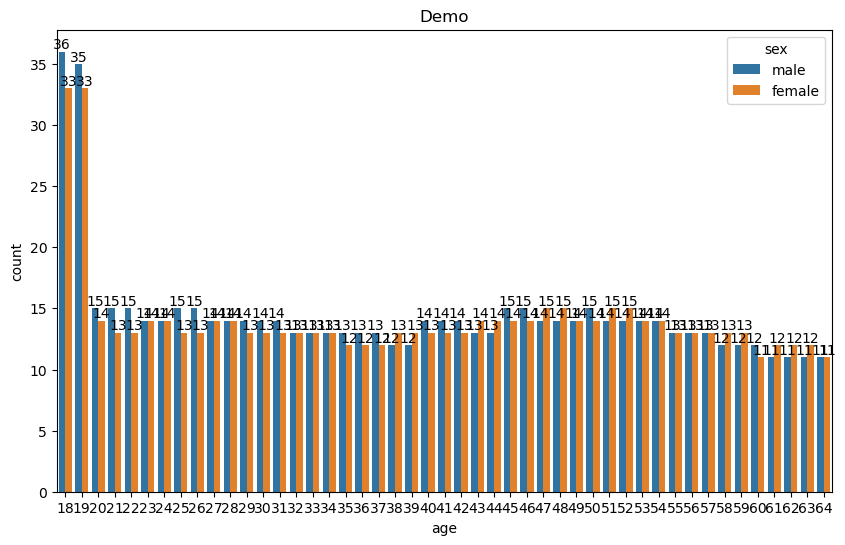

In [76]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="age", hue="sex")
plt.title("Demo")

for p in ax.containers:
    ax.bar_label(p)

plt.show()

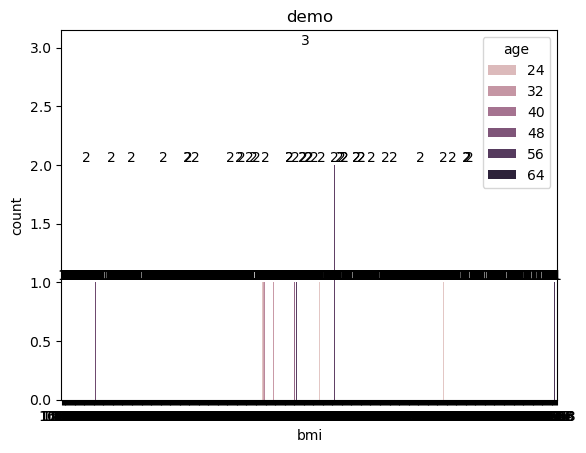

In [80]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["bmi"],hue="age")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

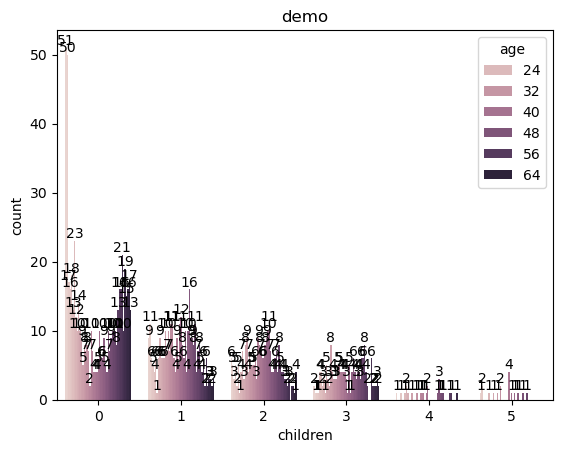

In [78]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["children"],hue="age")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

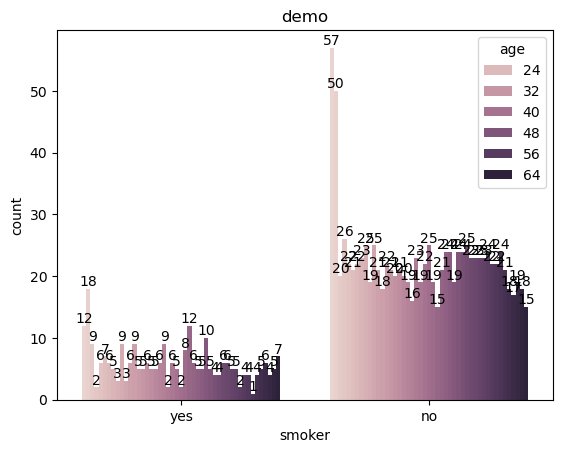

In [79]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["smoker"],hue="age")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

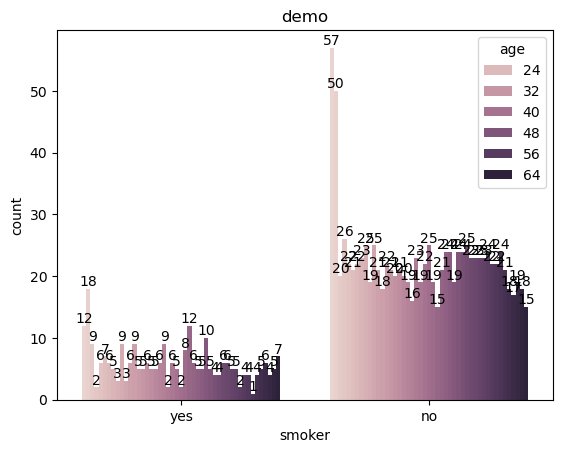

In [79]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["smoker"],hue="age")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

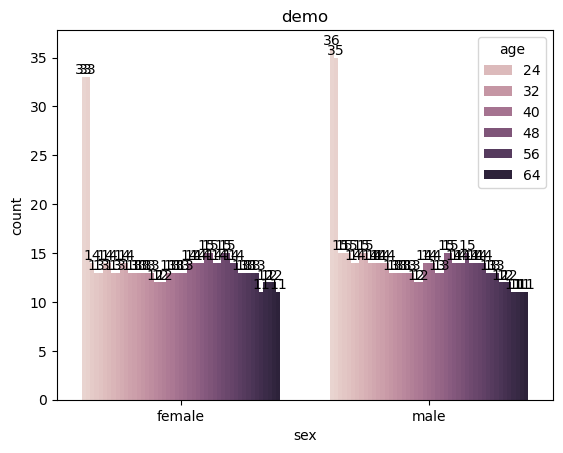

In [81]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["sex"],hue="age")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

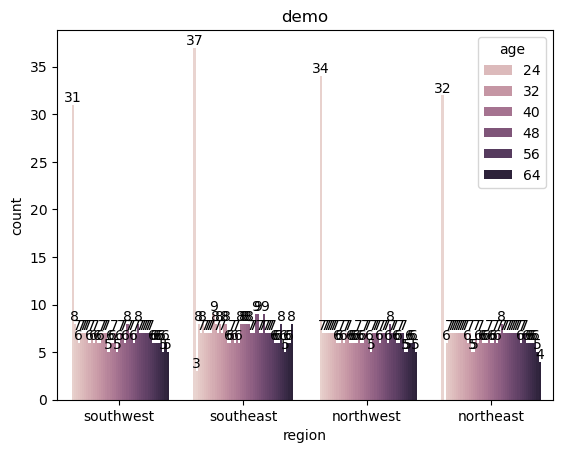

In [82]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["region"],hue="age")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

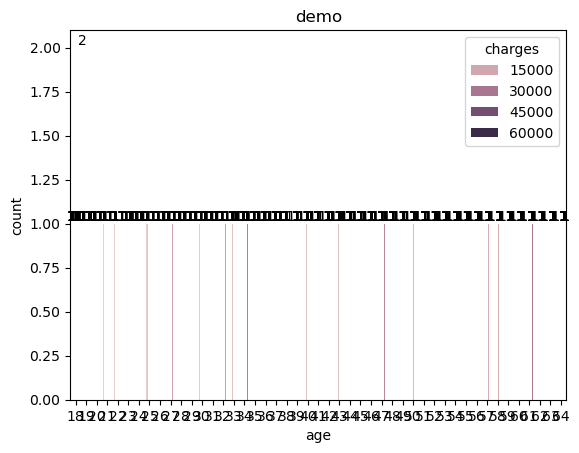

In [85]:
plt.Figure(figsize=(10,12))
ax=sns.countplot(data = df ,x=df ["age"],hue="charges")
plt.title("demo")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df.head()

In [87]:
df['sex'] = df['sex'].replace('female', 0)
df['sex'] = df['sex'].replace('male', 1)


C:\Users\Prachi Kumar\AppData\Local\Temp\ipykernel_19720\3190341041.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace('male', 1)


In [88]:
df['smoker']=df['smoker'].str.replace("yes","0")
df['smoker']=df['smoker'].str.replace("no","1")

In [89]:
df['region']=df['region'].str.replace("northwest","0")
df['region']=df['region'].str.replace("southwest","1")
df['region']=df['region'].str.replace("northeast","2")
df['region']=df['region'].str.replace("southeast","3")


In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,male,33.770,1,1,3,1725.55230
2,28,male,33.000,3,1,3,4449.46200
3,33,male,22.705,0,1,0,21984.47061
4,32,male,28.880,0,1,0,3866.85520


In [81]:
X = df.drop(['charges'],axis=1)
Y= df['charges']
print(X)
print(Y)

      age   sex     bmi  children smoker region
0      19     0  27.900         0      0      1
1      18  male  33.770         1      1      3
2      28  male  33.000         3      1      3
3      33  male  22.705         0      1      0
4      32  male  28.880         0      1      0
...   ...   ...     ...       ...    ...    ...
1333   50  male  30.970         3      1      0
1334   18     0  31.920         0      1      2
1335   18     0  36.850         0      1      3
1336   21     0  25.800         0      1      1
1337   61     0  29.070         0      0      0

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
git init
git add .
git commit -m "Add insurance data analysis notebook"
git branch -M main
git remote add origin https://github.com/kumariprachi8873/Insurance-Data-Analysis-Visualization.git
git push -u origin main
